# 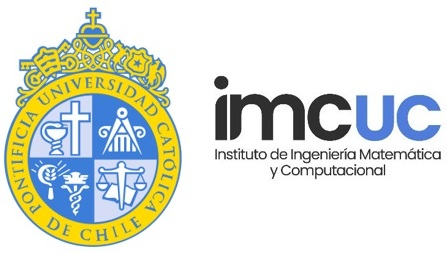  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-1**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Clase 08: Extracción de datos online - Webscraping</center></h1>

Este ejercicio busca que los estudiantes aprendan a usar librerias en Python para la lectura de datos desde la Web.


## 1. Nueva librería: `BeautifulSoup`.

Python tiene librerías específicas para hacer Web Scraping, las que nos ayudan a procesar el código HTML para analizarlo y recuprar los datos relevantes. 

El proceso de webscrapping en su expresión mas básica consiste en la extracción de datos desde el texto plano que estructura la página web (HTML). `requests` nos brinda herramientas para la extracción de la página, y a continuación podemos usar otras librerías como `BeautifulSoup` para la extracción de elementos o información contenida en el texto plano.

### Para instalar `BeautifulSoup`:

Esta librería está disponible en Anaconda, por lo que no deberían necesitar instalarlo, pero por si no lo tienen las opciones son:

`pip install BeautifulSoup4`

o

`conda install beautifulsoup4`

## 2. Extraccion por Web Scraping

Partamos cargando las librerías relevantes para esta clase.

In [1]:
# librerías
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

### 2.1 Leamos el código HTML de ejemplo

Veamos primero un ejemplo simple de código HTML para comprender su estructura general.

In [2]:
html_text=open('ejemplo.html','r').read()
html_text

"<html>\n    <head>\n        <title>Clase 8: Web Scrapping</title>\n    </head>\n    <body>\n        <h1>1. CÃ³digo HTML</h1>\n        <p> Este es un ejemplo para comprender la estructura de un documento HTML. Los pasos a seguir son:\n          <ul id='list' class='pasos'>\n            <li> Leer el cÃ³digo HTML</li>\n            <li> Formatear (parse) usando BeautifulSoup, y </li>\n            <li> Extraer la informaciÃ³n de interÃ©s. </li>\n          </ul>\n        </p>\n\n        <p>TambiÃ©n podemos crear una tabla:\n\n          <table>\n           <tr>\n             <th>Curso</th>\n             <th>CrÃ©ditos</th>\n             <th>N Estudiantes</th>\n           </tr>\n           <tr>\n             <td>IMT2200</td>\n             <td>10</td>\n             <td>59</td>\n           </tr>\n           <tr>\n             <td>ICS3213</td>\n             <td>10</td>\n             <td>98</td>\n           </tr>\n           <tr>\n             <td>MDS3010</td>\n             <td>5</td>\n           

### 2.2 Usemos `BeautifulSoup` para hacer sentido de este código

Usamos la librería para revisar el código HTML y poder hacer sentido de lo que tenemos.

In [3]:
soup = bs(html_text, "html.parser")
soup

<html>
<head>
<title>Clase 8: Web Scrapping</title>
</head>
<body>
<h1>1. CÃ³digo HTML</h1>
<p> Este es un ejemplo para comprender la estructura de un documento HTML. Los pasos a seguir son:
          <ul class="pasos" id="list">
<li> Leer el cÃ³digo HTML</li>
<li> Formatear (parse) usando BeautifulSoup, y </li>
<li> Extraer la informaciÃ³n de interÃ©s. </li>
</ul>
</p>
<p>TambiÃ©n podemos crear una tabla:

          <table>
<tr>
<th>Curso</th>
<th>CrÃ©ditos</th>
<th>N Estudiantes</th>
</tr>
<tr>
<td>IMT2200</td>
<td>10</td>
<td>59</td>
</tr>
<tr>
<td>ICS3213</td>
<td>10</td>
<td>98</td>
</tr>
<tr>
<td>MDS3010</td>
<td>5</td>
<td>48</td>
</tr>
</table>
</p>
</body>
</html>

Esta librería además nos permite buscar información en forma simple y rápido:

In [4]:
soup.table.find_all('tr')

[<tr>
 <th>Curso</th>
 <th>CrÃ©ditos</th>
 <th>N Estudiantes</th>
 </tr>,
 <tr>
 <td>IMT2200</td>
 <td>10</td>
 <td>59</td>
 </tr>,
 <tr>
 <td>ICS3213</td>
 <td>10</td>
 <td>98</td>
 </tr>,
 <tr>
 <td>MDS3010</td>
 <td>5</td>
 <td>48</td>
 </tr>]

In [5]:
table = soup.find('table')
print(table)

<table>
<tr>
<th>Curso</th>
<th>CrÃ©ditos</th>
<th>N Estudiantes</th>
</tr>
<tr>
<td>IMT2200</td>
<td>10</td>
<td>59</td>
</tr>
<tr>
<td>ICS3213</td>
<td>10</td>
<td>98</td>
</tr>
<tr>
<td>MDS3010</td>
<td>5</td>
<td>48</td>
</tr>
</table>


### 2.3 Usemos `BeautifulSoup` para hacer sentido de este código

Usamos la librería para revisar el código HTML y poder hacer sentido de lo que tenemos.

In [6]:
df = pd.DataFrame(columns=['Curso', 'Creditos', 'nEstudiantes'])
table = soup.find('table')
rows = table.find_all('tr')

for row in rows[1::]:
    cols = row.find_all("td")
    col_text=[c.text for c in cols]
    print(col_text)
    new_row = pd.DataFrame({'Curso':col_text[0], 'Creditos':col_text[1], 'nEstudiantes':col_text[2]}, index=['Curso'])
    df = pd.concat([df, new_row], ignore_index=True)
df

['IMT2200', '10', '59']
['ICS3213', '10', '98']
['MDS3010', '5', '48']


,Curso,Creditos,nEstudiantes
0,IMT2200,10,59
1,ICS3213,10,98
2,MDS3010,5,48


## 3. Apliquemos lo aprendido

Tratemos de contestar la siguiente pregunta:
¿Cuanto exporta de café el mayor exportador del mundo con respecto a todas las exportaciones mundiales?

Esta información la podemos extraer de Wikipedia como fuente: https://en.wikipedia.org/wiki/List_of_countries_by_coffee_production

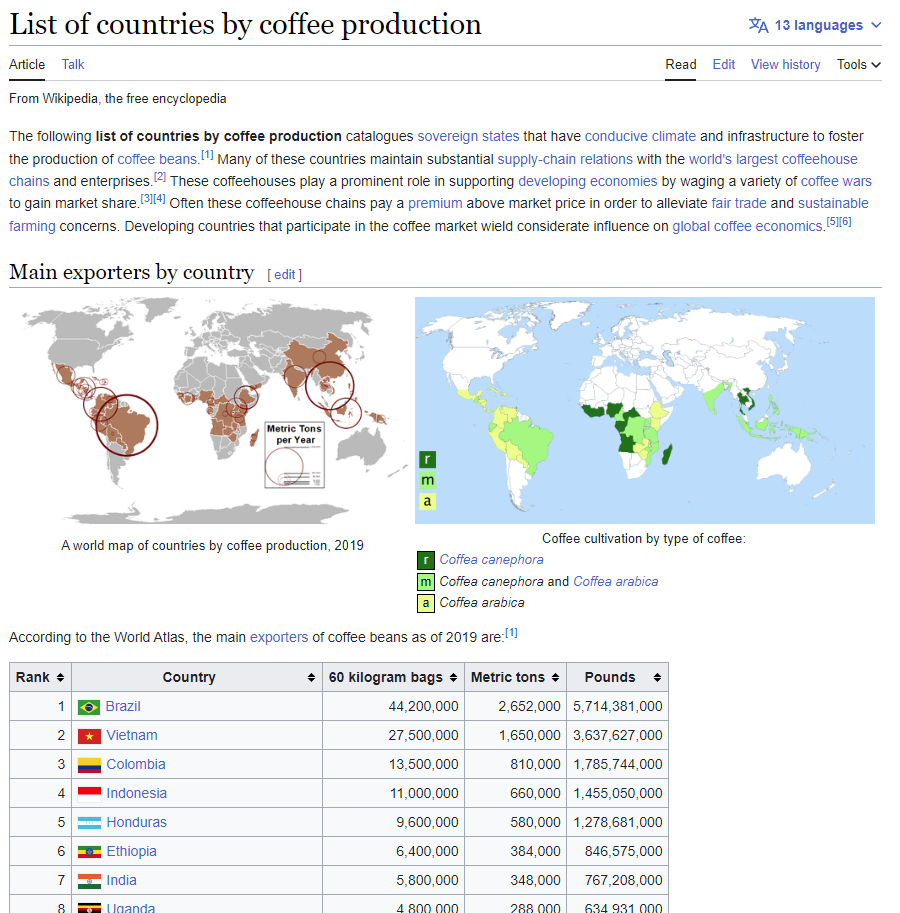

In [7]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_coffee_production"
page = requests.get(url).text
page

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of countries by coffee production - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design

In [8]:
soup = bs(page)
soup

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries by coffee production - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disa

Al inspeccionar la página, podemos ver que los nombres de países y cantidades están enmarcadas por la etiqueta `<table>`. Dado que es la primera tabla de la página, fondemos usar la función `find` para extraerla. Esto nos entrega todo el contenido de la tabla, incluyendo el encabezado (primera fila) y las cantidades en distintas unidades.

In [9]:
tables = soup.find_all('table')
len(tables)

4

In [10]:
tables[0]

<table border="1" class="wikitable sortable" style="text-align:right">
<tbody><tr>
<th>Rank
</th>
<th>Country
</th>
<th>60 kilogram bags
</th>
<th>Metric tons
</th>
<th>Pounds
</th></tr>
<tr>
<td>1
</td>
<td style="text-align:left"><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><a href="/wiki/Brazil" title="Brazil"><img alt="Brazil" class="mw-file-element" data-file-height="504" data-file-width="720" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/22px-Flag_of_Brazil.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/33px-Flag_of_Brazil.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/43px-Flag_of_Brazil.svg.png 2x" width="22"/></a></span></span> <a href="/wiki/Coffee_production_in_Brazil" title="Coffee production in Brazil">Brazil</a>
</td>
<td>44,200,000
</td>
<td>2,652,000
</td>
<td>5,714,381,000
</td></tr>
<tr>
<td>2
</td>
<td style="text-align:l

In [11]:
table = soup.find('table')
table

<table border="1" class="wikitable sortable" style="text-align:right">
<tbody><tr>
<th>Rank
</th>
<th>Country
</th>
<th>60 kilogram bags
</th>
<th>Metric tons
</th>
<th>Pounds
</th></tr>
<tr>
<td>1
</td>
<td style="text-align:left"><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><a href="/wiki/Brazil" title="Brazil"><img alt="Brazil" class="mw-file-element" data-file-height="504" data-file-width="720" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/22px-Flag_of_Brazil.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/33px-Flag_of_Brazil.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/43px-Flag_of_Brazil.svg.png 2x" width="22"/></a></span></span> <a href="/wiki/Coffee_production_in_Brazil" title="Coffee production in Brazil">Brazil</a>
</td>
<td>44,200,000
</td>
<td>2,652,000
</td>
<td>5,714,381,000
</td></tr>
<tr>
<td>2
</td>
<td style="text-align:l

Pasemos esto a un DataFrame.

In [12]:
#creamos un DataFrame vacío con los títulos de la tabla
df = pd.DataFrame(columns = ['country','bags_60kg','tons_metric','pounds'])

# iterar sobre cada fila ('tr') para completar la información
for row in table.find_all('tr')[1::]:
    cols = row.find_all("td")
    #print(cols)
    cols = [col.text.strip() for col in cols]
    #print(cols)
    country = cols[1]
    bags = cols[2]
    tons = cols[3]
    pounds = cols[4]
    new_row = pd.DataFrame({'country': country, 'bags_60kg': bags, 'tons_metric': tons,'pounds':pounds}, index=['country'])
    df = pd.concat([df, new_row], ignore_index=True)
df.head()

,country,bags_60kg,tons_metric,pounds
0,Brazil,"44,200,000","2,652,000","5,714,381,000"
1,Vietnam,"27,500,000","1,650,000","3,637,627,000"
2,Colombia,"13,500,000","810,000","1,785,744,000"
3,Indonesia,"11,000,000","660,000","1,455,050,000"
4,Honduras,"9,600,000","580,000","1,278,681,000"


In [13]:
# total de exportación
df['tons_metric'].sum()

'2,652,0001,650,000810,000660,000580,000384,000348,000288,000234,000204,000192,000132,000116,820108,00089,52049,98048,00048,00045,72042,00034,20031,20031,20030,00030,00030,00024,00021,00020,10015,00012,00012,00012,0009,6007,2006,0006,0005,4004,8003,9002,4002,2202,1602,1001,2601,200960720600360120'

In [14]:
type(tons)

str

In [15]:
int(tons)

120

In [16]:
int(pounds)

ValueError: invalid literal for int() with base 10: '264,000'

In [17]:
int(pounds.replace(',', ''))

264000

In [18]:
#creamos un DataFrame vacío con los títulos de la tabla
df = pd.DataFrame(columns = ['country','bags_60kg','tons_metric','pounds'])

# iterar sobre cada fila ('tr') para completar la información
for row in table.find_all('tr')[1::]:
    cols = row.find_all("td")
    #print(cols)
    cols = [col.text.strip() for col in cols]
    #print(cols)
    country = cols[1]
    bags = int(cols[2].replace(',', ''))
    tons = int(cols[3].replace(',', ''))
    pounds = int(cols[4].replace(',', ''))
    new_row = pd.DataFrame({'country': country, 'bags_60kg': bags, 'tons_metric': tons,'pounds':pounds}, index=['country'])
    df = pd.concat([df, new_row], ignore_index=True)
df.head()

,country,bags_60kg,tons_metric,pounds
0,Brazil,44200000,2652000,5714381000
1,Vietnam,27500000,1650000,3637627000
2,Colombia,13500000,810000,1785744000
3,Indonesia,11000000,660000,1455050000
4,Honduras,9600000,580000,1278681000


In [19]:
# total de exportación
df['tons_metric'].sum()

9041740

In [20]:
100*df['tons_metric'][0]/df['tons_metric'].sum()

29.330637686993875